In [70]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()



In [71]:

b = sp.Symbol('b', real=True)  # tłumienie

x = sp.Function('x')
t = sp.Symbol('t', real=True) 
w0 = sp.Symbol('omega_0', positive=True)  
x0= sp.Symbol('x_0', real=True) 
v0= sp.Symbol('v_0', real=True)  
x(t), t, w0, x0, v0



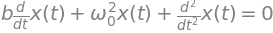

In [72]:

Eq = sp.Eq(x(t).diff(t, t) + b * x(t).diff(t) +w0**2 * x(t), 0)
Eq


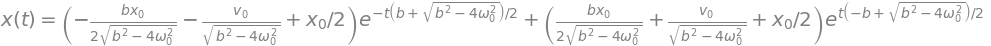

In [ ]:

warunki_pocz = {x(0): x0, x(t).diff(t).subs(t, 0): v0}


rozwiazania_ics = sp.dsolve(Eq, x(t), ics=warunki_pocz)
rozwiazania_ics

c:\Users\janko\AppData\Local\pypoetry\Cache\virtualenvs\projekt8-DG07qA9A-py3.10\lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\janko\AppData\Local\pypoetry\Cache\virtualenvs\projekt8-DG07qA9A-py3.10\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


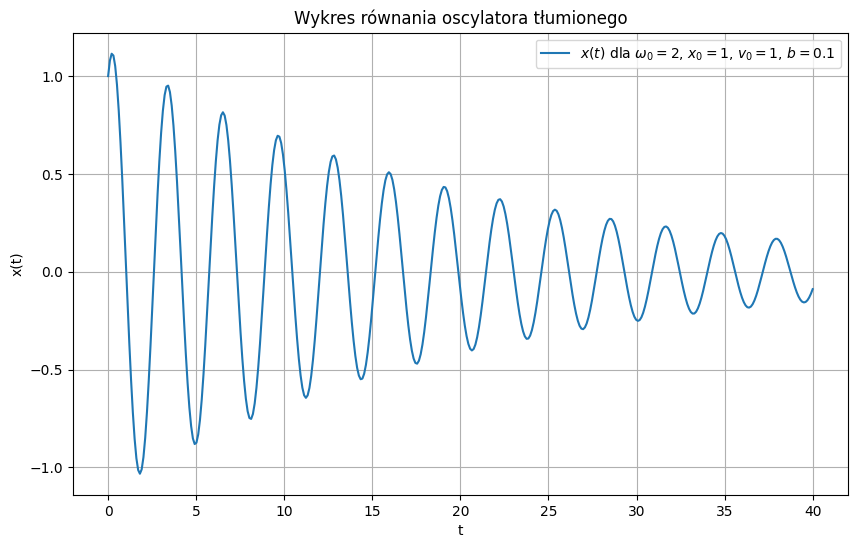

In [ ]:

parametry = {w0: 2, x0: 1, v0: 1, b: 0.1}


solution_with_values = rozwiazania_ics.subs(parametry)


x_t = solution_with_values.rhs


x_t_func = sp.lambdify(t, x_t, modules=['numpy'])


t_vals = np.linspace(0, 40, 400)
x_vals = x_t_func(t_vals)


plt.figure(figsize=(10, 6))
plt.plot(t_vals, x_vals, label=f'$x(t)$ dla $\\omega_0={initial_values[w0]}$, $x_0={initial_values[x0]}$, $v_0={initial_values[v0]}$, $b={initial_values[b]}$')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Wykres równania oscylatora tłumionego')
plt.legend()
plt.grid(True)
plt.show()


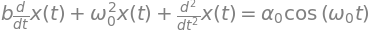

In [75]:
# Dla wymuszenia kosinusoidalnego
a0 = sp.Symbol('alpha_0')  
Eq_wym= sp.Eq(x(t).diff(t, t) + b * x(t).diff(t) +w0**2 * x(t), a0*sp.cos(w0*t))
Eq_wym

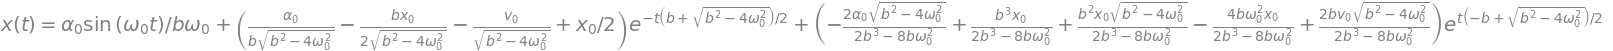

In [76]:
Soleq_wym = sp.dsolve(Eq_wym, x(t), ics=ics)
Soleq_wym


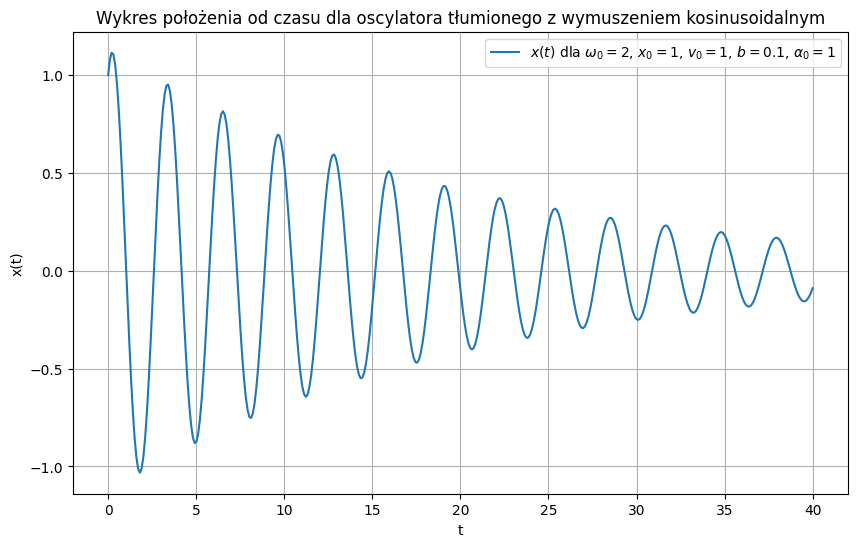

In [77]:
# Ustawienie wartości początkowych dla a0 = 1
warunki_a0 = {w0: 2, x0: 1, v0: 1, b: 0.1, a0: 1}

# Podstawienie wartości początkowych do rozwiązania
rozwiazania_a0 = solution_with_ics.subs(warunki_a0)


x_t_a0 = rozwiazania_a0.rhs


x_t_func_a0 = sp.lambdify(t, x_t_a0, modules=['numpy'])


x_vals_a0 = x_t_func_a0(t_vals)

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(t_vals, x_vals_a0, label=f'$x(t)$ dla $\\omega_0={initial_values[w0]}$, $x_0={initial_values[x0]}$, $v_0={initial_values[v0]}$, $b={initial_values[b]}$, $\\alpha_0=1$')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Wykres położenia od czasu dla oscylatora tłumionego z wymuszeniem kosinusoidalnym')
plt.legend()
plt.grid(True)
plt.show()